
## Creating the fake dataset
Forescasting price of houses

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Synthatic data
np.random.seed(42)

n_samples = 500
rooms = np.random.randint(1,6 ,size=n_samples) # Number of rooms 1 to 5
area = np.random.randint(30, 200, size=n_samples) # Area in m²: 30 to 200
age = np.random.randint(0, 50, size=n_samples) # Age of house: 0 to 50 years

# Price: a function of rooms, area, and age (with some random noise)
price = rooms * 50000 + area * 1000 - age * 500 + np.random.normal(0, 10000, size=n_samples)

# Creating the dataset
data = pd.DataFrame({
    'rooms' : rooms,
    'area' : area,
    'age' : age,
    'price' : price.round(2)
})

display(data.head())

,rooms,area,age,price
0,4,91,12,280236.22
1,5,113,30,353973.06
2,3,141,46,266717.88
3,5,115,35,342488.60
4,5,170,44,402685.63


## Split the into features

In [6]:
X = data[['rooms','area','age']]
y = data['price']

## Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train model

In [8]:
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## <strong>Make Prediction <strong>

In [9]:
y_pred = model.predict(X_test)

# Make the evaluation of the model

In [10]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE : {mse:.2f}')

# mse_result = value(square root) 

MSE : 180303570.80


## Comparison

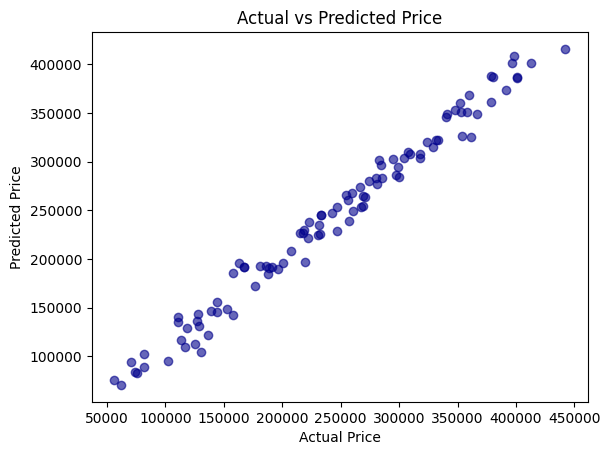

In [11]:
residuals = y_test - y_pred


plt.scatter(y_test, y_pred, alpha=0.6, color='darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.rcParams['axes.spines.right'] = False # Removing axes
plt.rcParams['axes.spines.top'] = False # Removing axes
plt.show()

## Saving model

In [12]:
import joblib

joblib.dump(model, "house_price_model.pkl")
print("Saved model succesful")

Saved model succesful
